In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_classif
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, log_loss
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from collections import Counter


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
numerical = ['duration', 'campaign', 'pdays','previous','age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
objects = ['marital', 'education', 'housing', 'default', 'loan', 'contact', 'month', 'day_of_week','poutcome','job']

In [9]:
for o in objects:
    print(o.capitalize() + ':\n', df[o].unique()) 

Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Housing:
 ['no' 'yes' 'unknown']
Default:
 ['no' 'unknown' 'yes']
Loan:
 ['no' 'yes' 'unknown']
Contact:
 ['telephone' 'cellular']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Day_of_week:
 ['mon' 'tue' 'wed' 'thu' 'fri']
Poutcome:
 ['nonexistent' 'failure' 'success']
Job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [10]:
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 12


In [11]:
df = df.drop_duplicates(keep=False)
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 0


<Axes: xlabel='y', ylabel='count'>

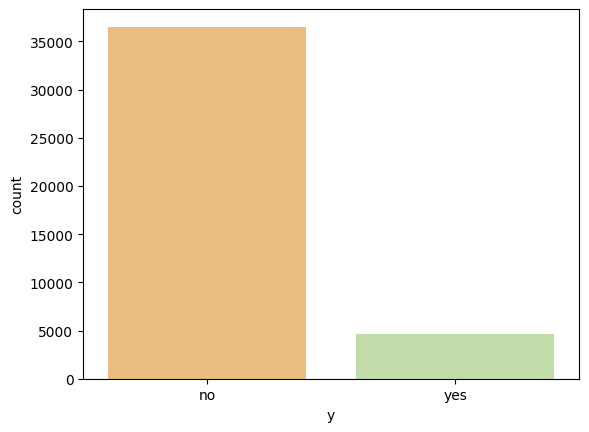

In [12]:
fig, ax = plt.subplots()
sns.countplot(x='y', data=df, palette='Spectral')

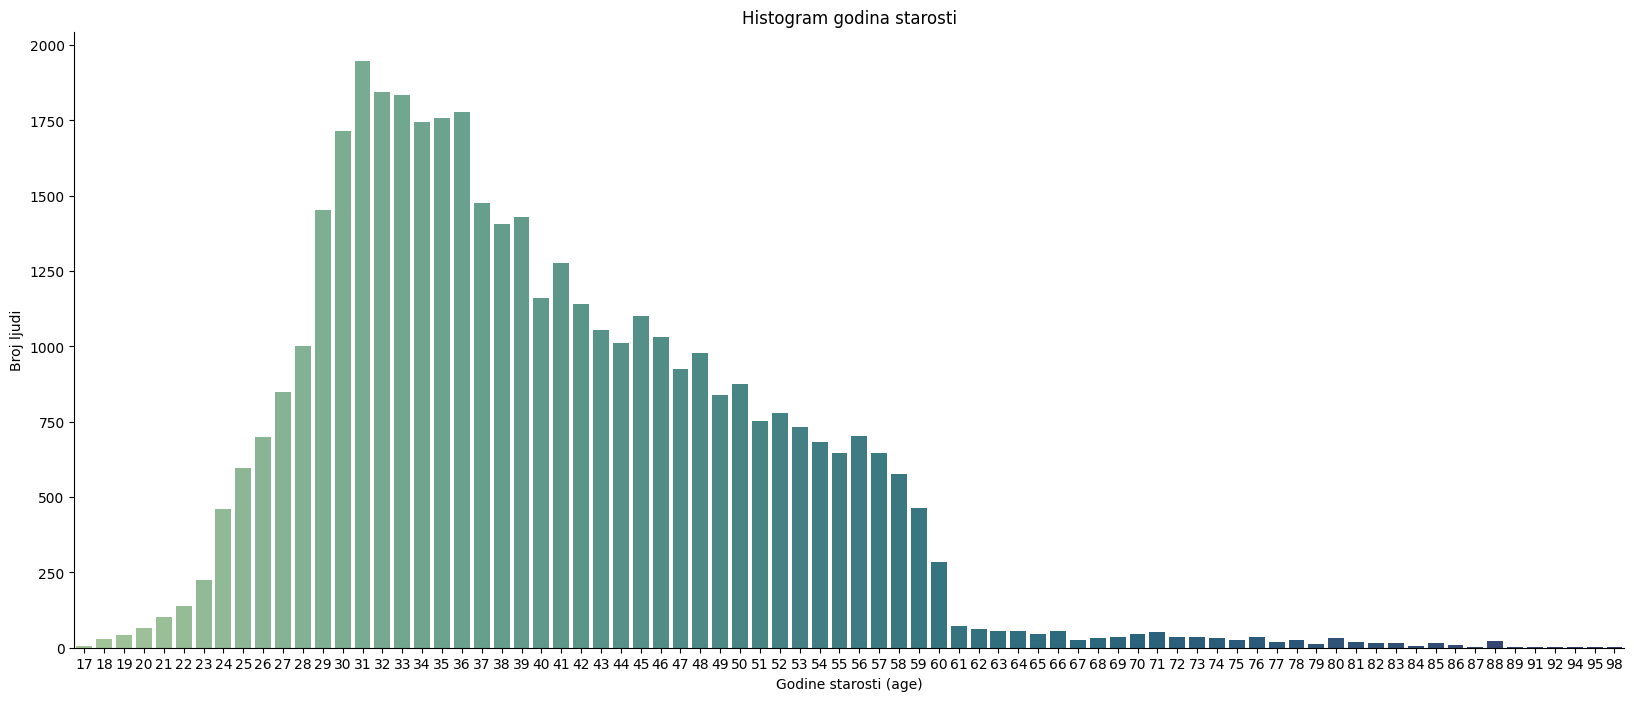

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df, palette="crest")
ax.set_xlabel('Godine starosti (age)')
ax.set_ylabel('Broj ljudi')
ax.set_title('Histogram godina starosti')
sns.despine()

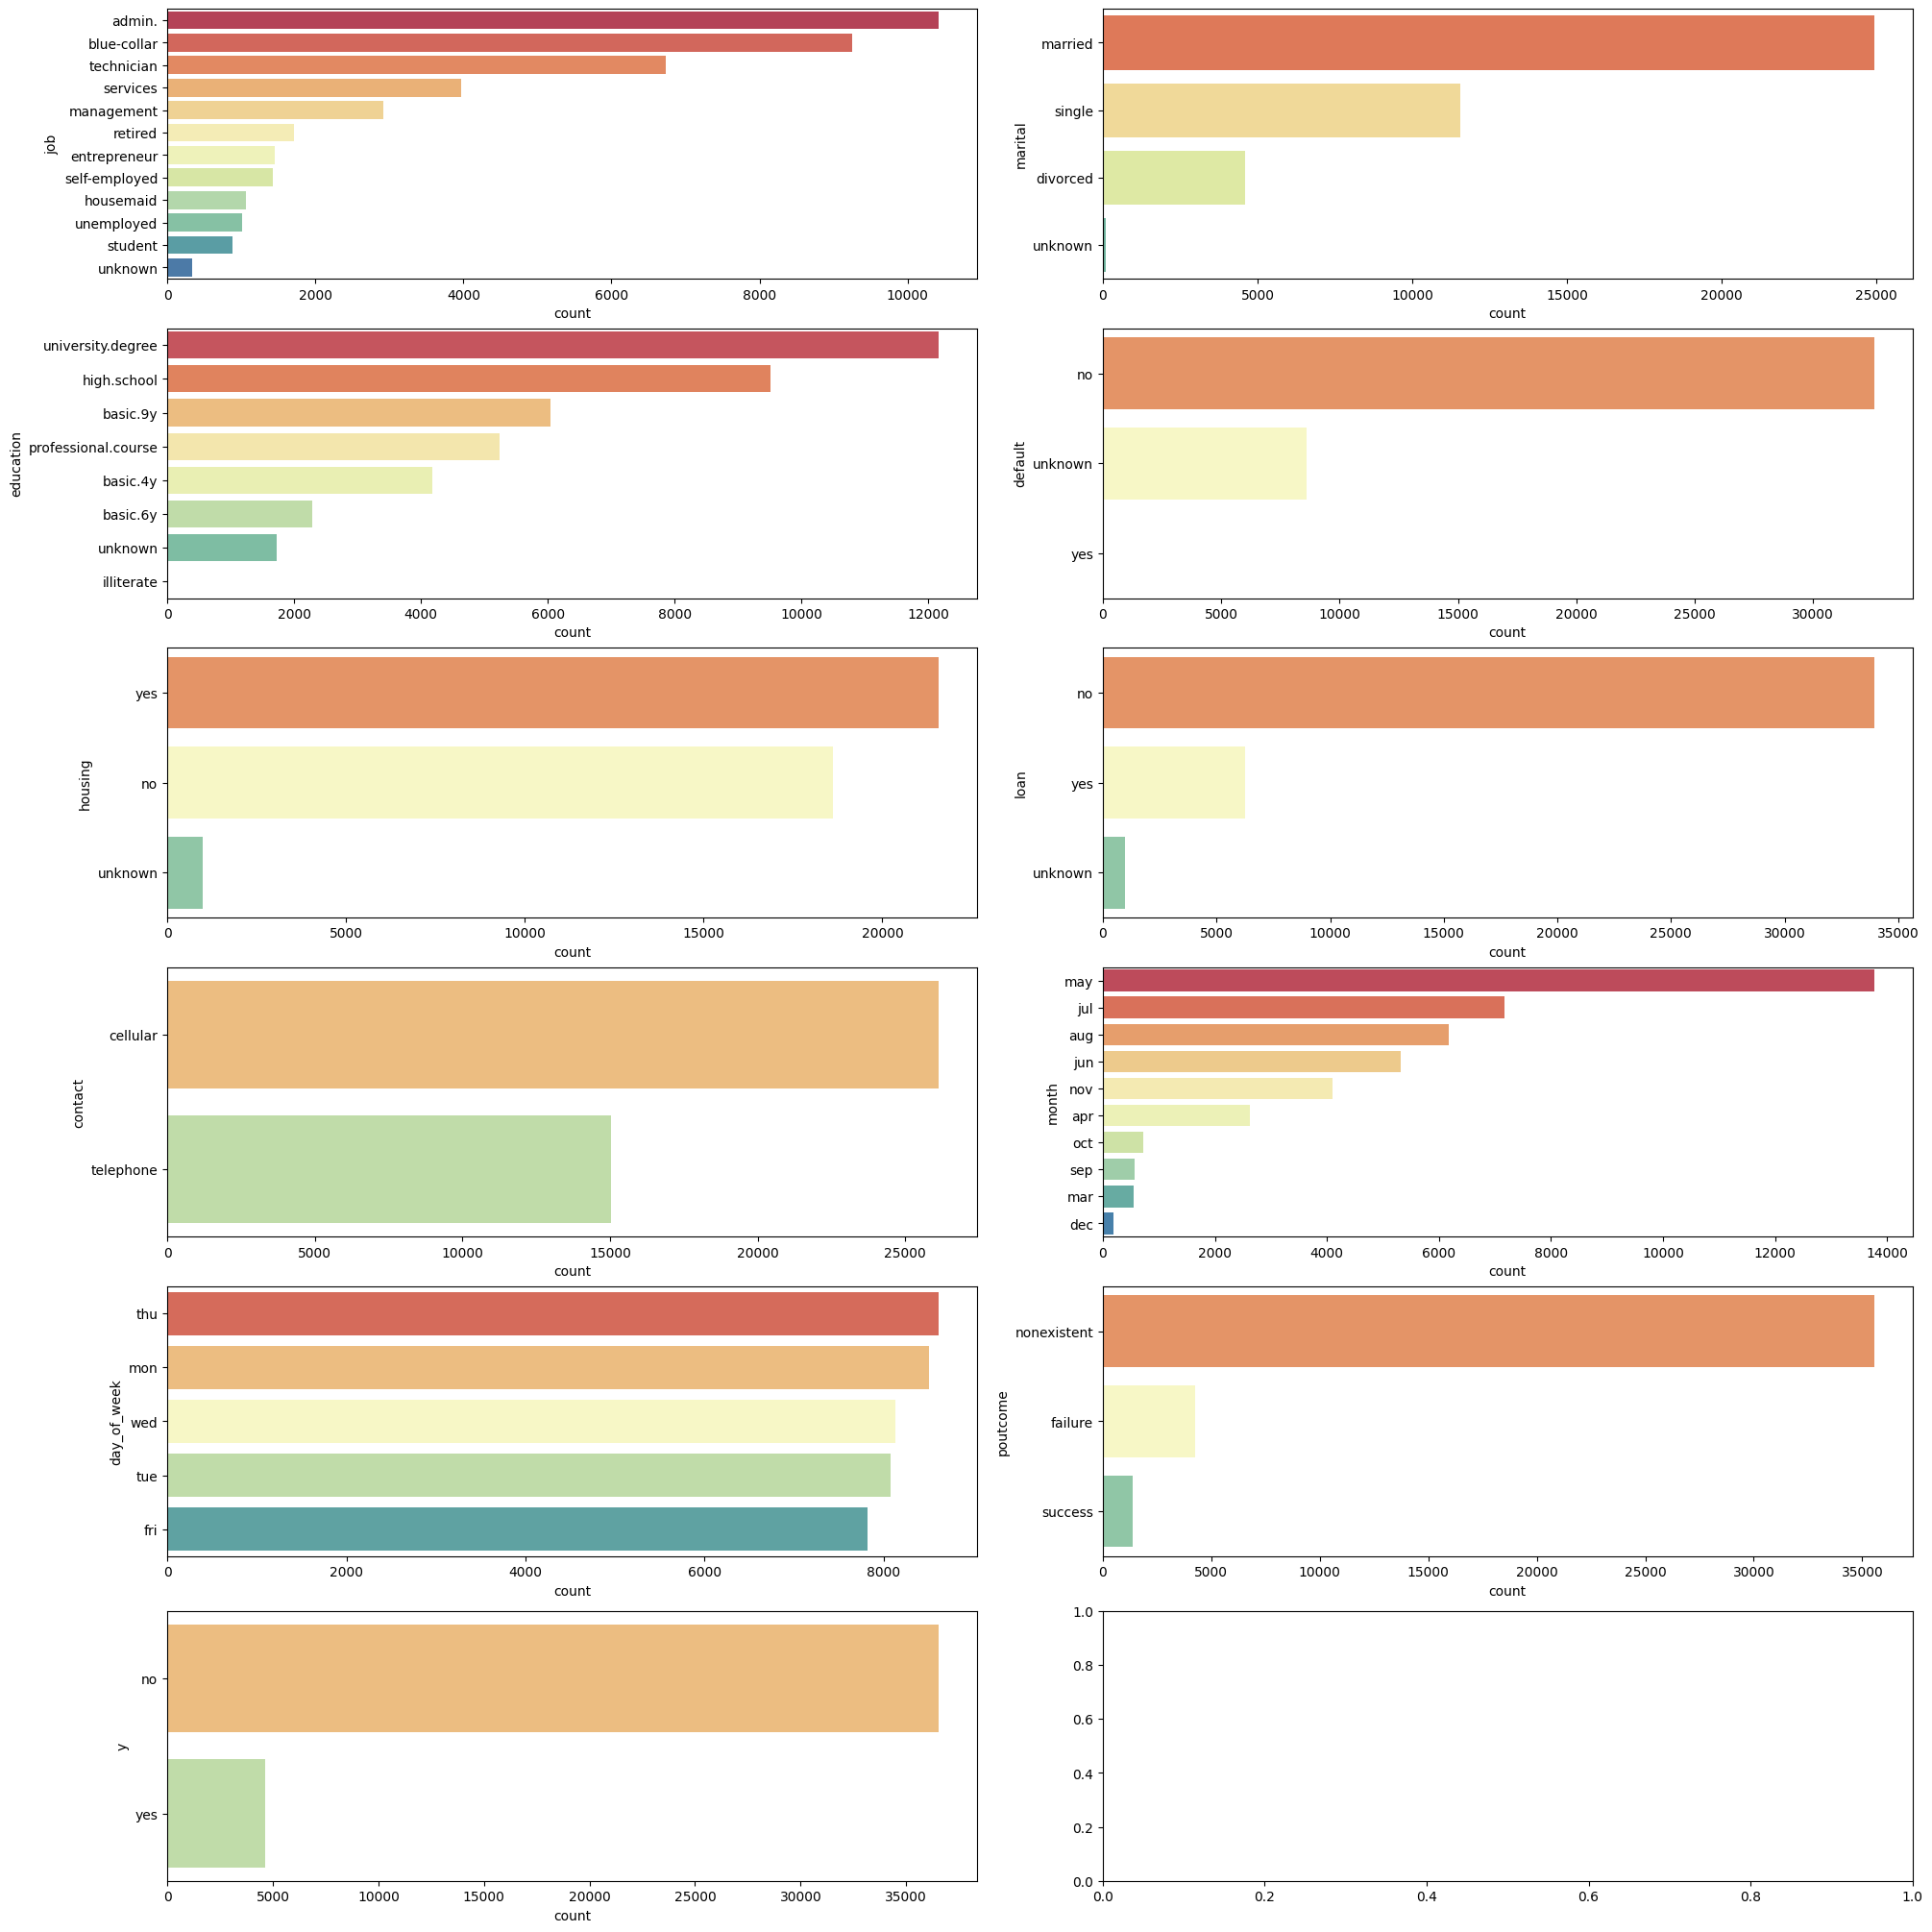

In [14]:
fig, axs = plt.subplots(6, 2, figsize=(20, 20), constrained_layout=True)
categorical = df.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='Spectral')

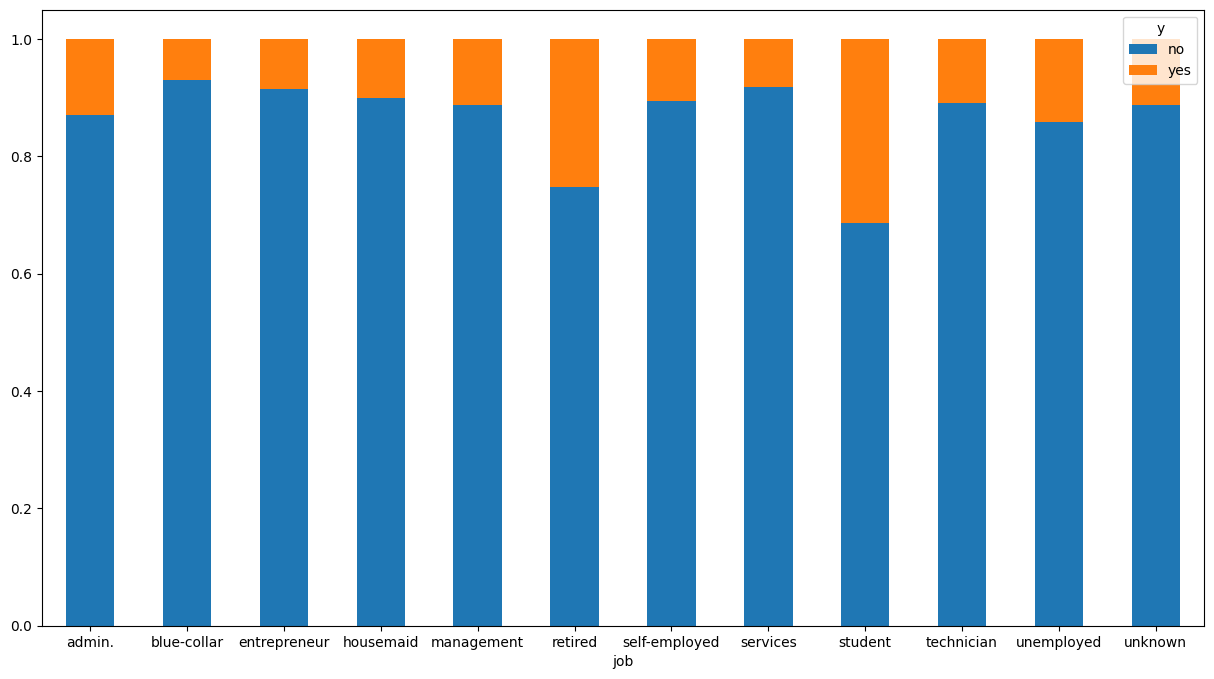

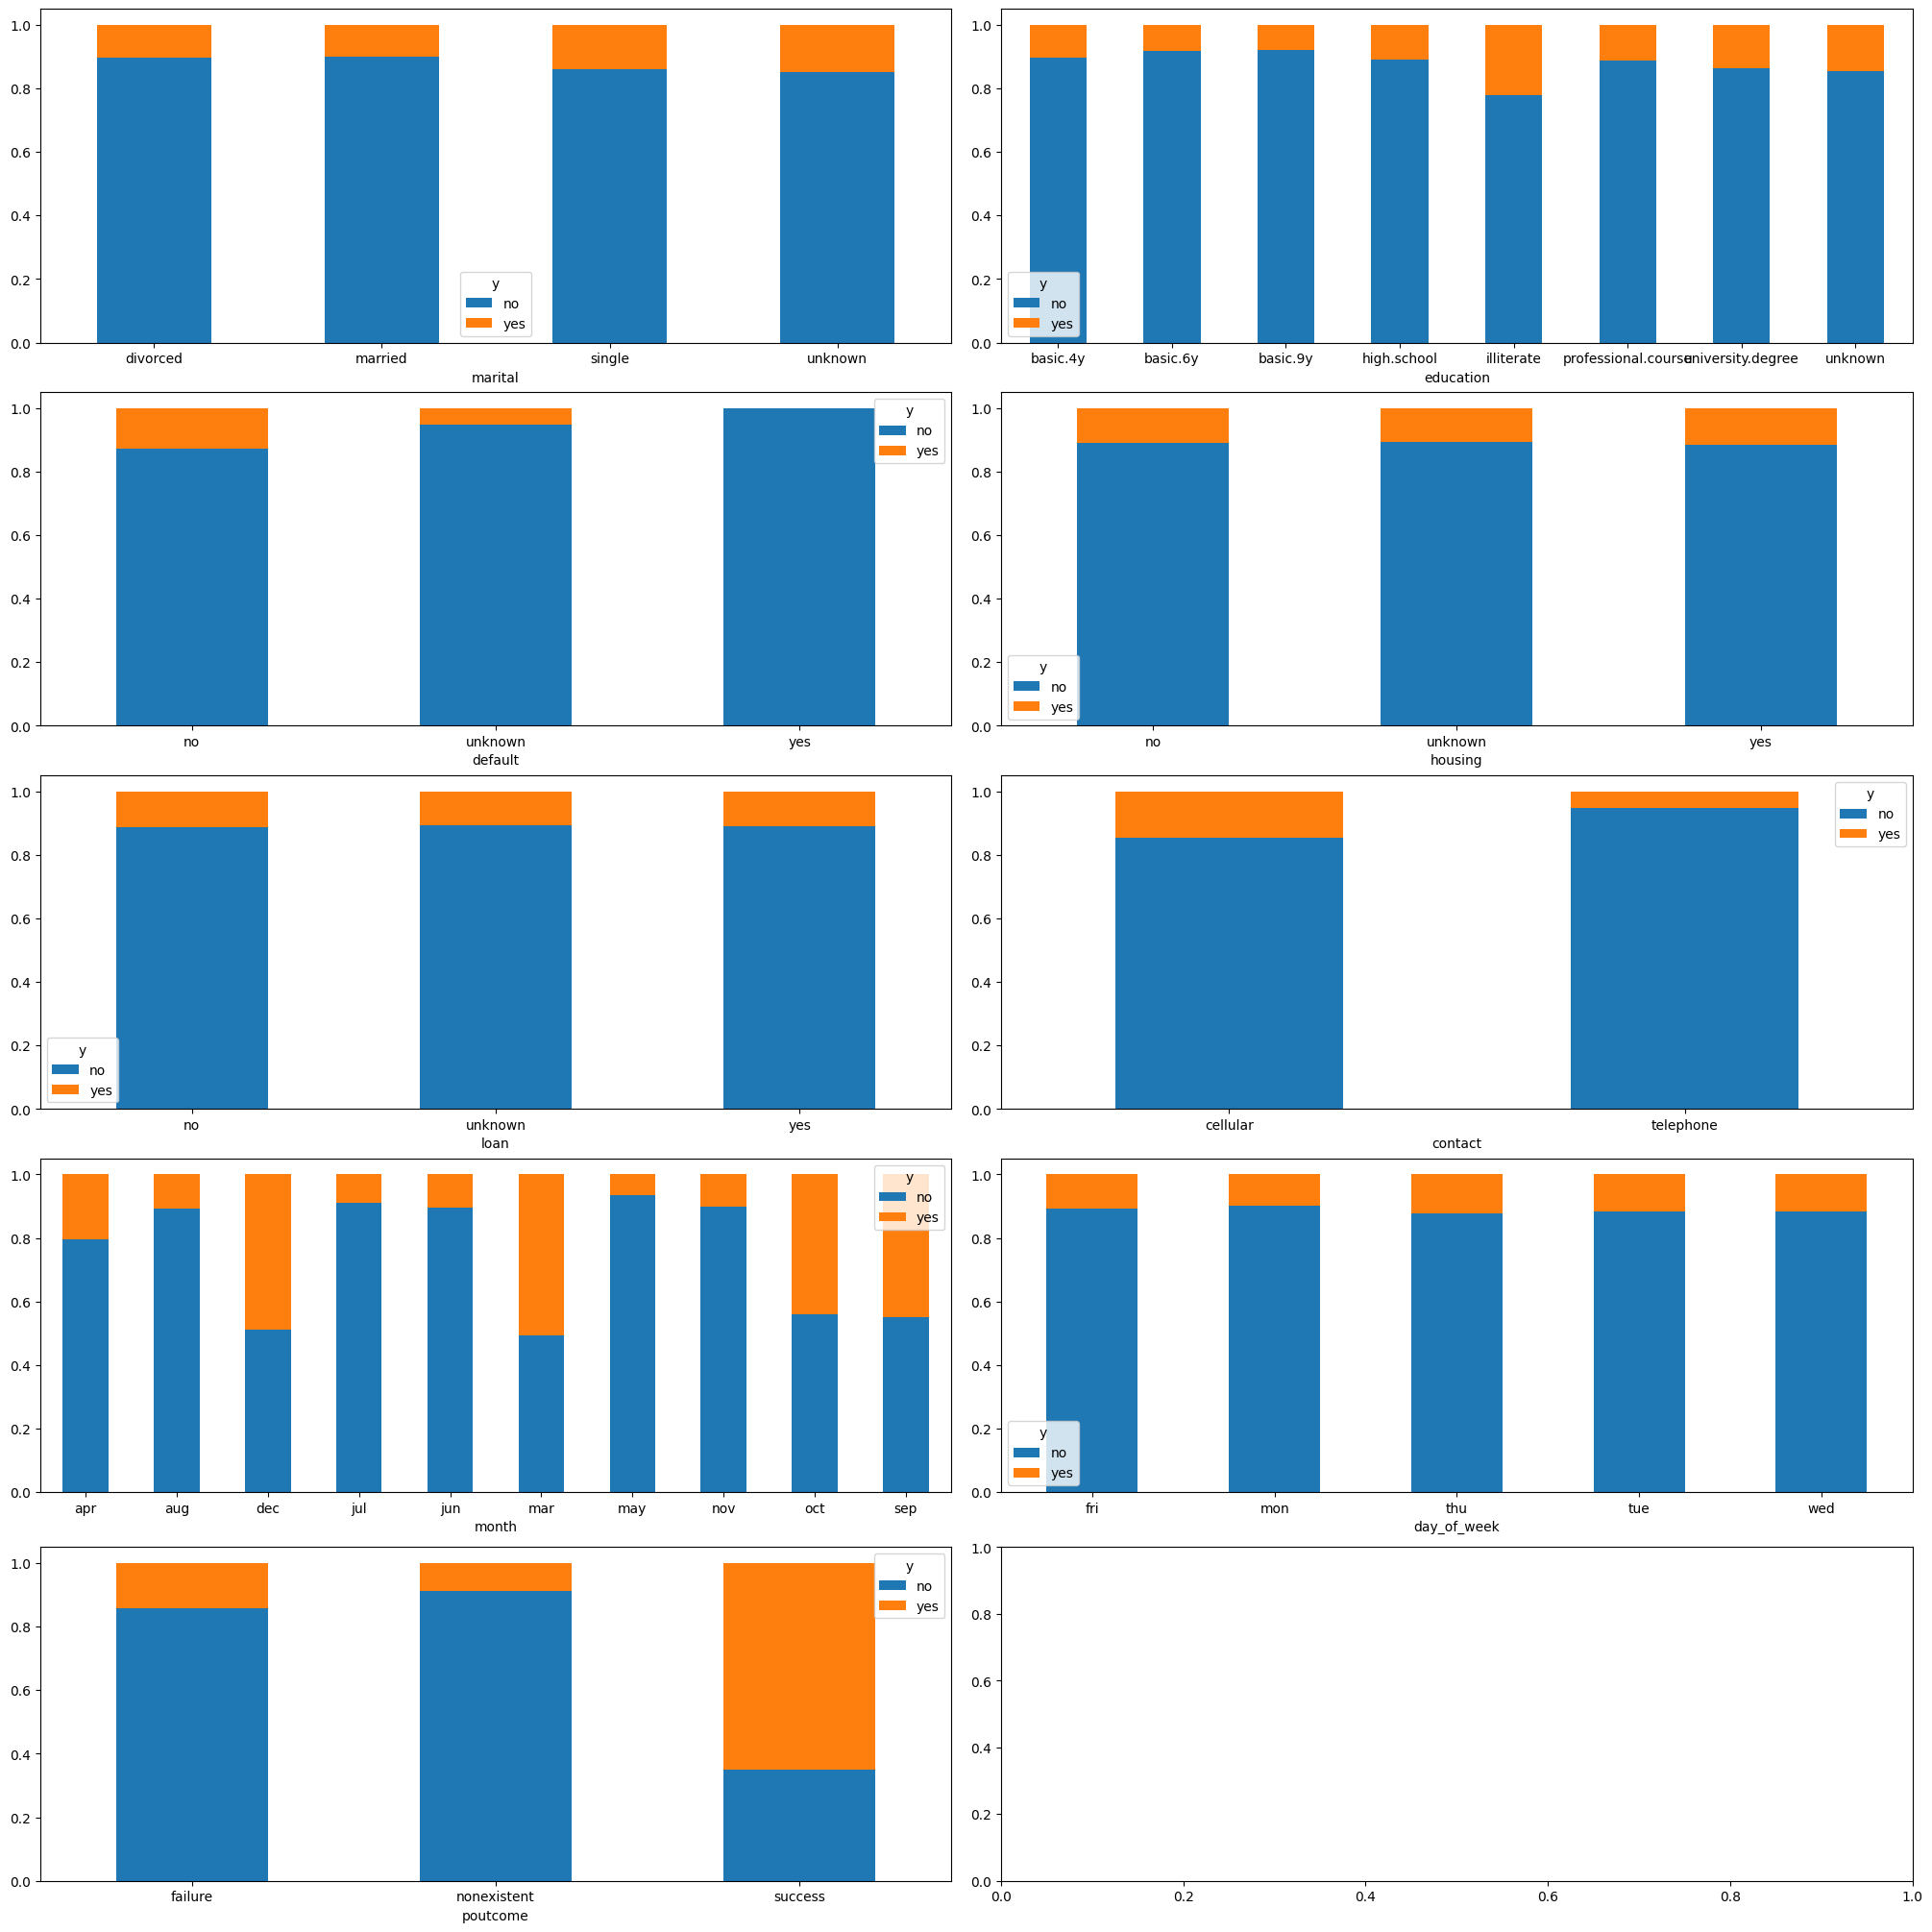

In [15]:
counts = pd.crosstab(df['job'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages.plot.bar(stacked=True, rot=0, figsize=(15, 8))
plt.show()
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
for i, f in enumerate(categorical[1:-1]):
    counts = pd.crosstab(df[f], df['y'])
    percentages = counts.div(counts.sum(1), axis=0)
    percentages.plot.bar(stacked=True, ax=axs[i//2][i % 2], rot=0)
plt.show()

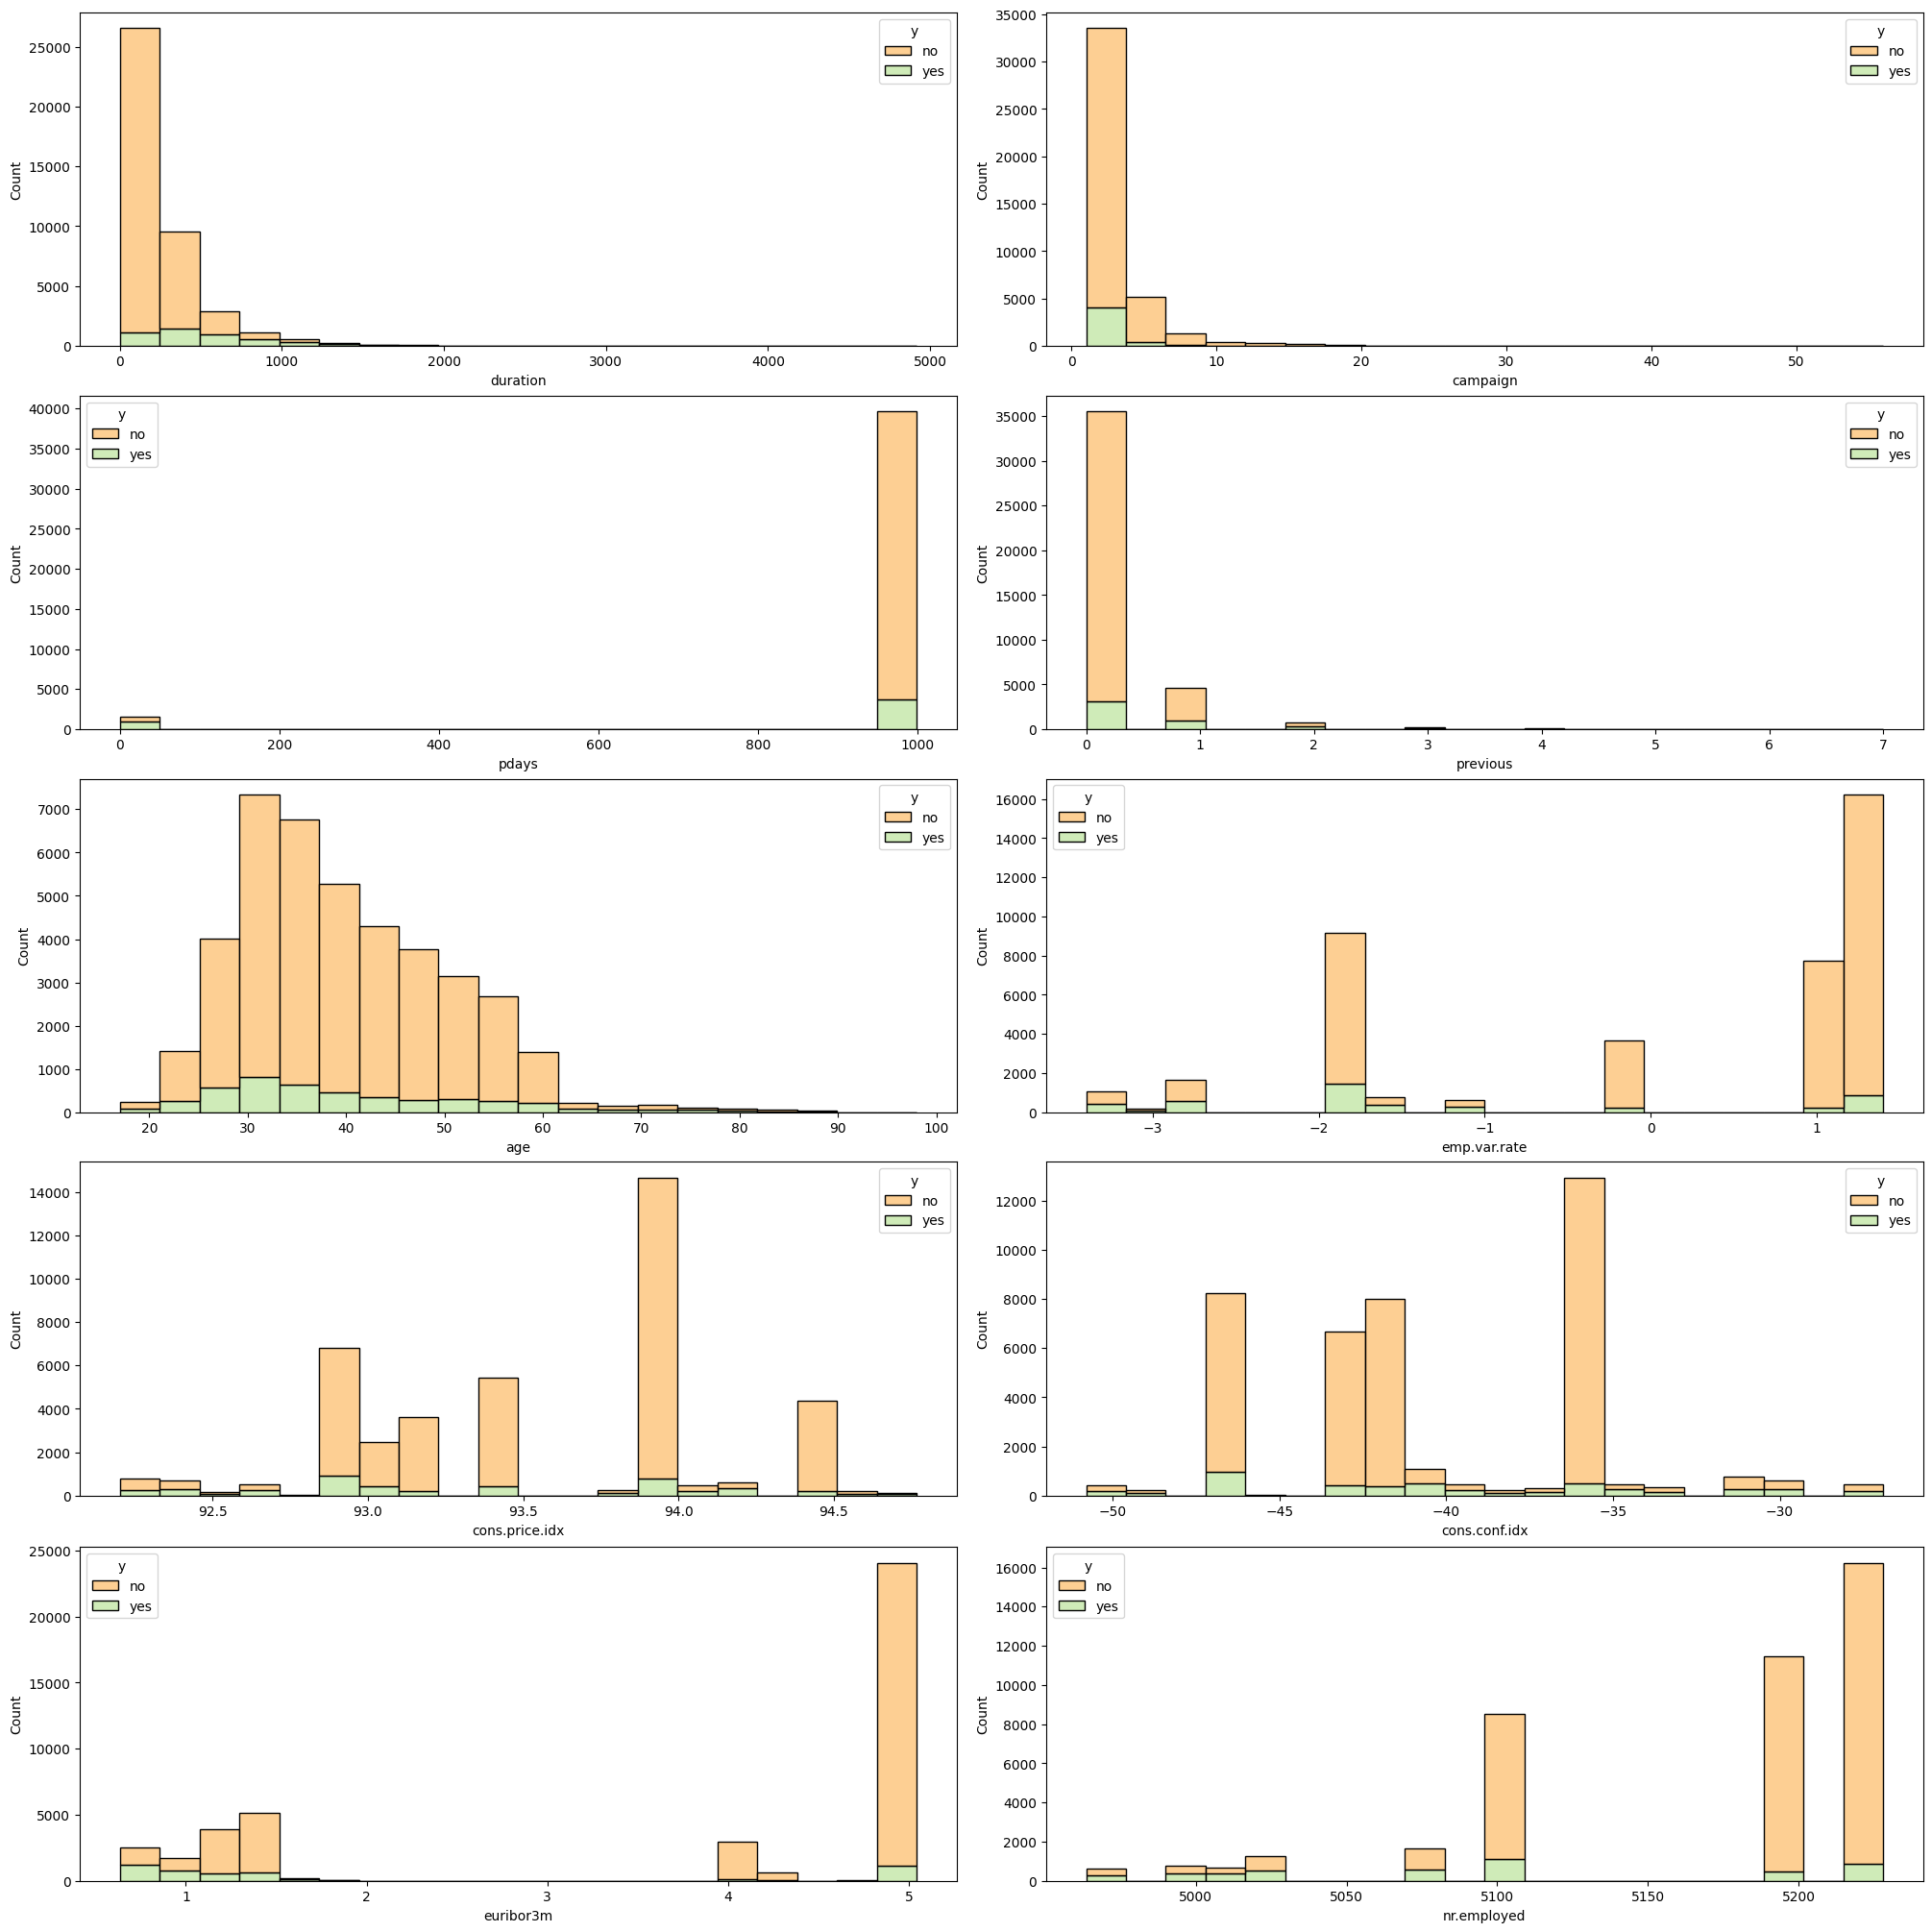

In [16]:
fig, axs = plt.subplots(len(numerical)//2, 2, figsize=(20, 20), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df, hue='y', multiple='stack',
                 ax=axs[i//2][i % 2], bins=20, palette='Spectral')
plt.show()

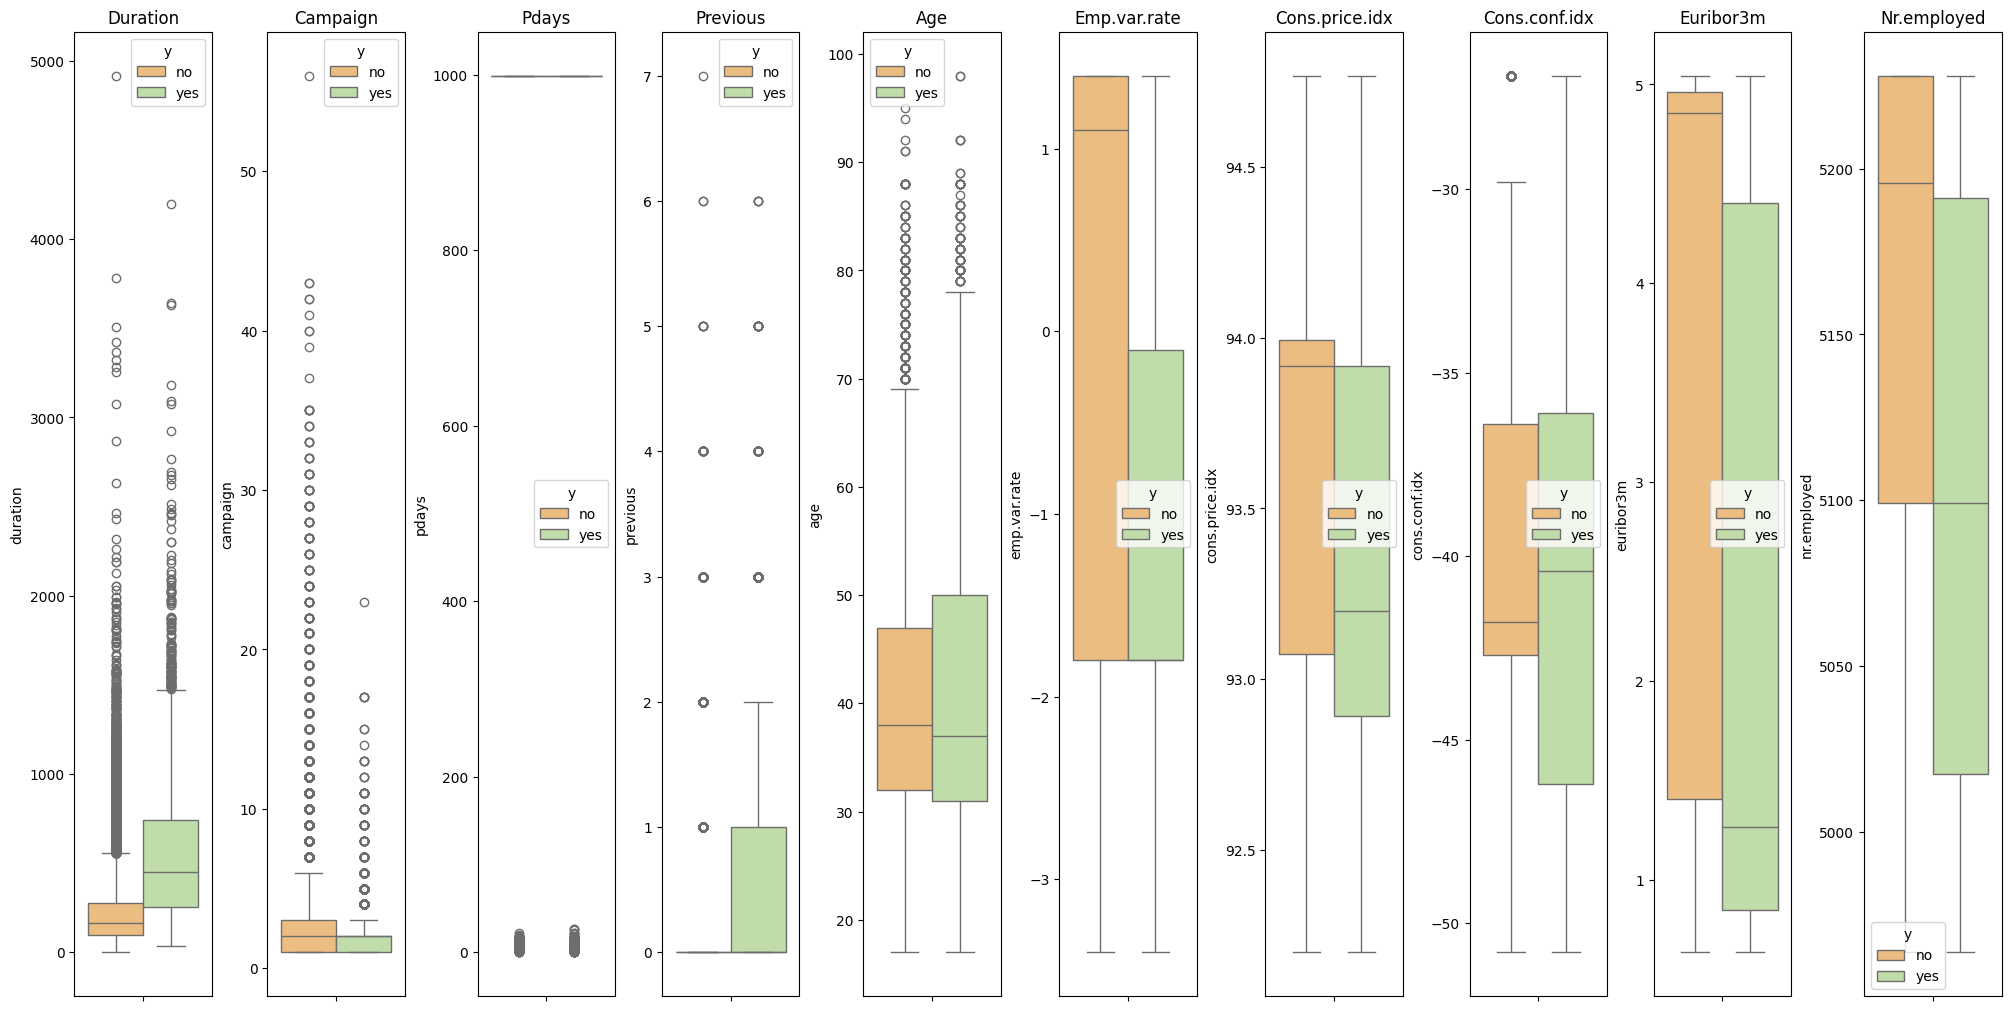

In [17]:
fig, axs = plt.subplots(1,len(numerical), figsize=(20, 10), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.boxplot(y=f, data=df, hue = 'y', ax=axs[i], palette='Spectral')
    axs[i].set_title(f.capitalize())

plt.show()


## Preprocesiranje


In [18]:
# remove poutcome columns
# df = df.drop(columns=['poutcome'])

In [19]:
labels = ['housing', 'default', 'loan', 'y']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


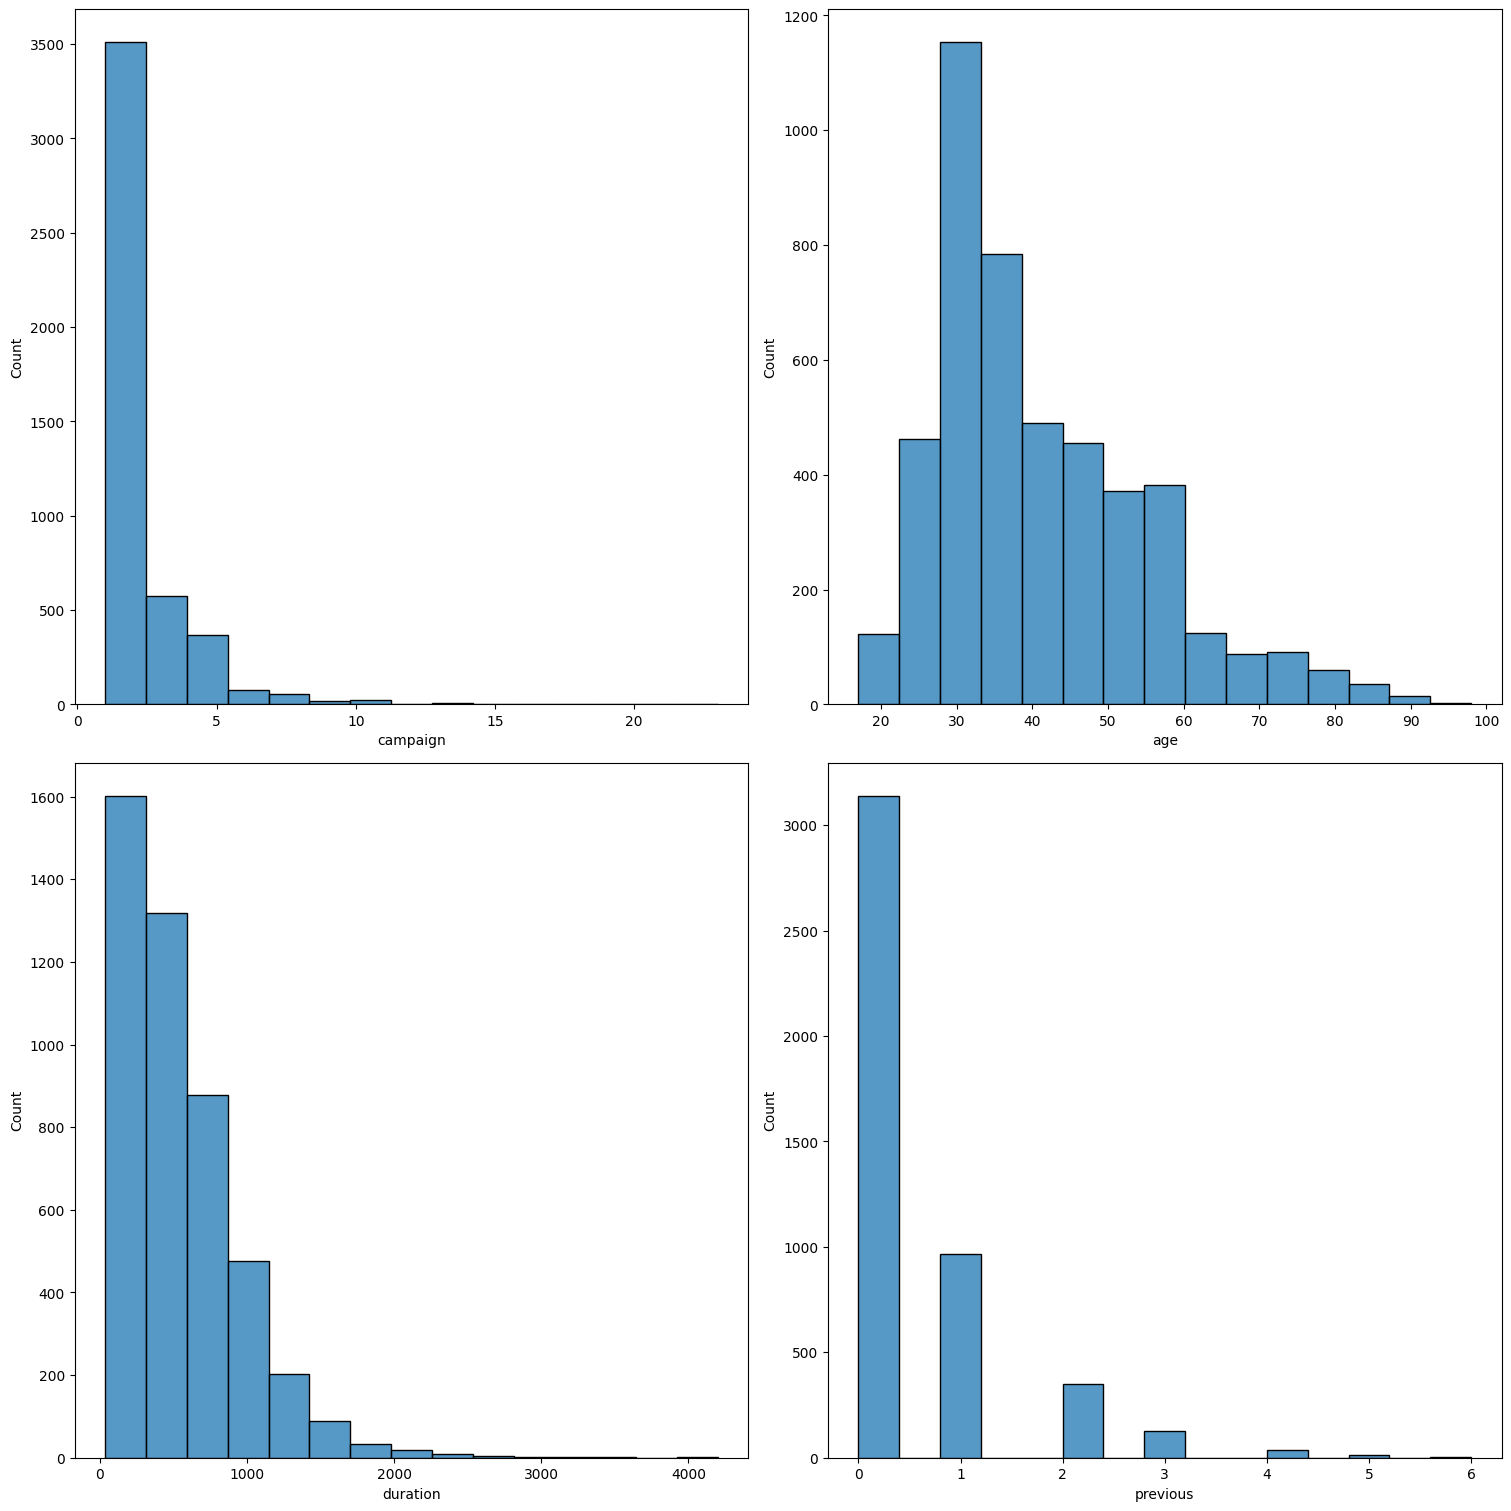

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), constrained_layout=True)
for i, f in enumerate(['campaign', 'age', 'duration', 'previous']):
    sns.histplot(x=f, data=df[(df['y'] == 'yes') | (
        df['y'] == 1)],  ax=axs[i//2][i % 2], bins=15, palette='Spectral')
plt.show()

In [21]:

def remove_outliers_standard_deviation(df,features,n) -> pd.DataFrame:
     
    outlier_list = []

    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()        
        cut_off = data_std * 3
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_list.extend(outlier_list_column)

    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    df1 = df[df[column] > data_mean + cut_off]
    df2 = df[df[column] < data_mean - cut_off]
    print('Total number of outliers is:', df1.shape[0]+ df2.shape[0])
    
    return multiple_outliers   

        

In [22]:
from collections import Counter

def remove_outliers_iqr(df,features,n) -> pd.DataFrame:
     
    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)

        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 0.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)

    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers 

        

Pre izbacivanja: (41164, 21)
Total number of outliers is: 1515


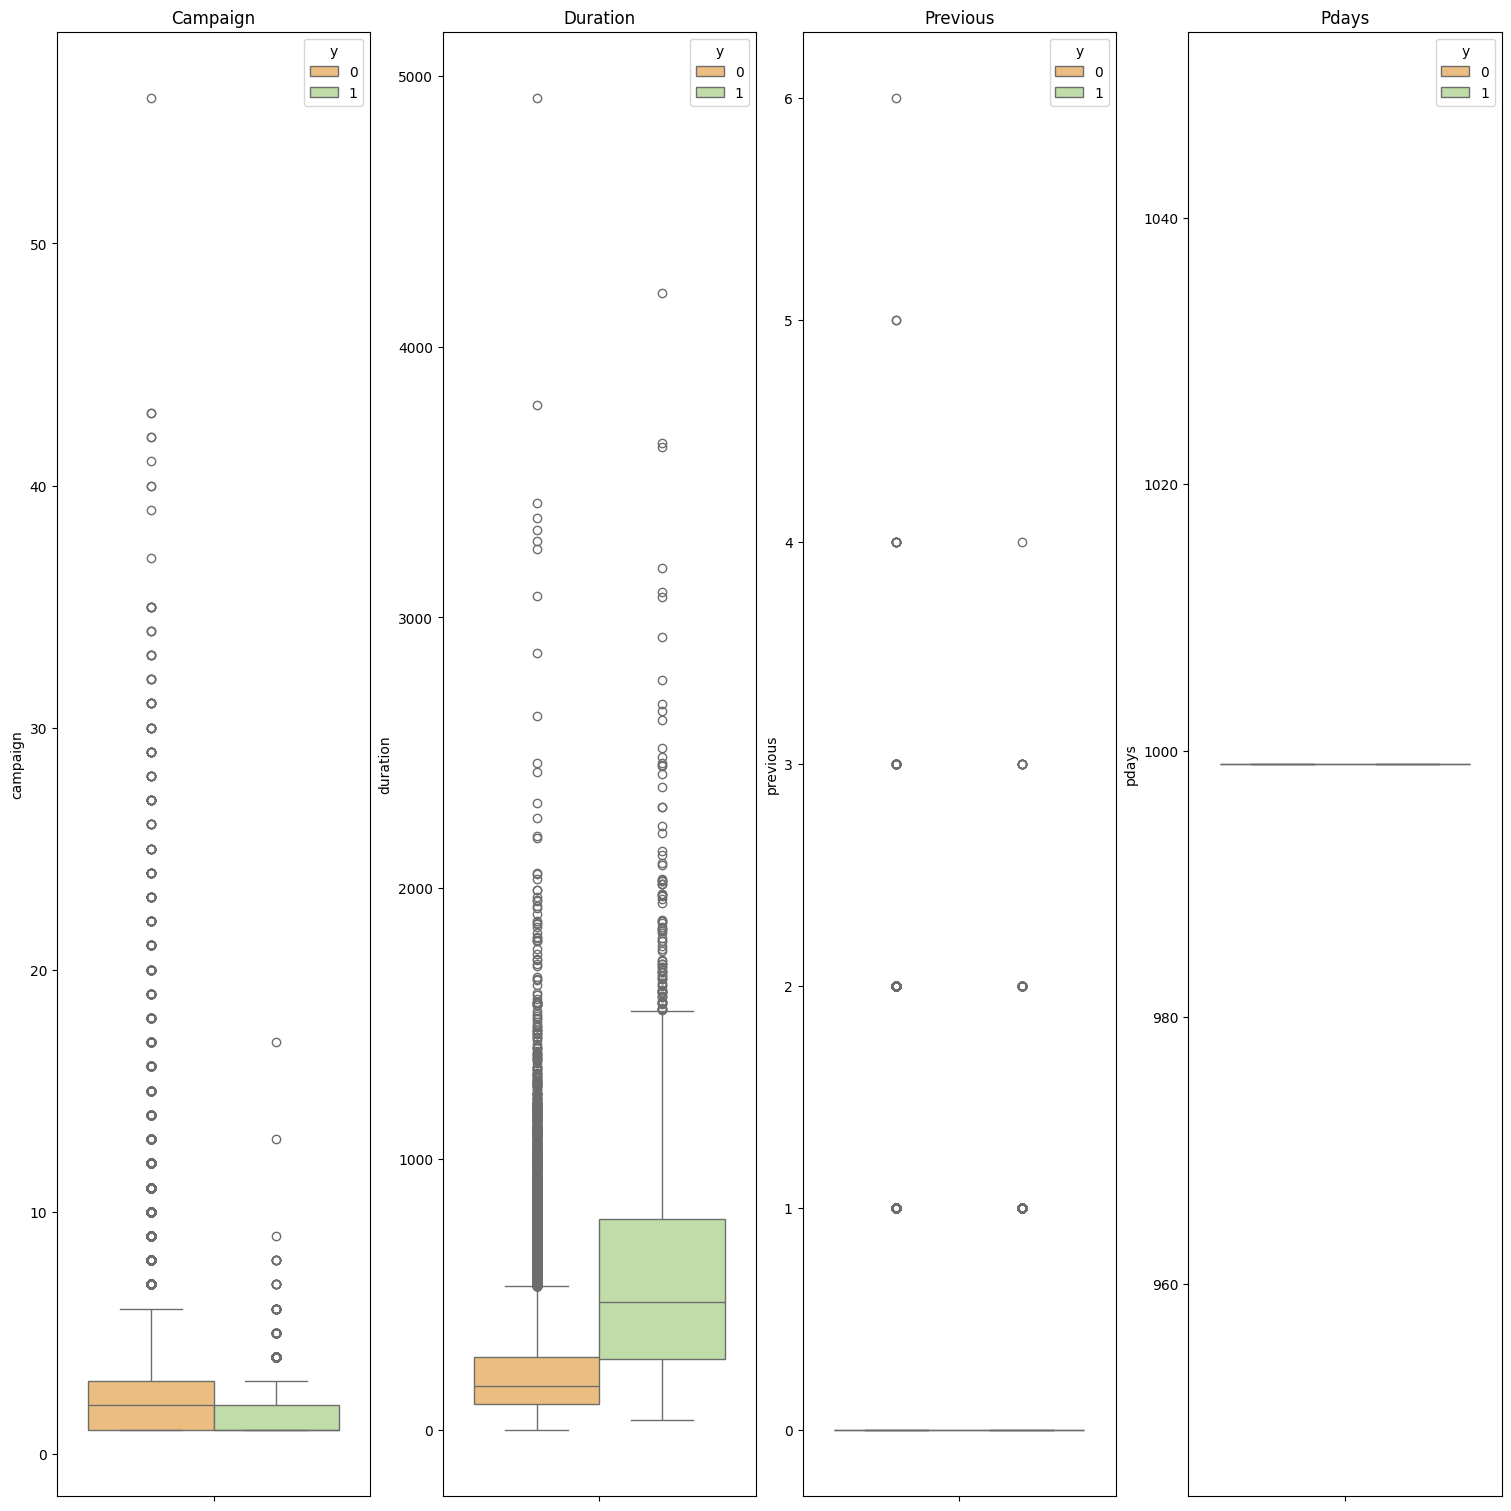

Nakon izbacivanja: (38251, 21)


In [23]:
print(f"Pre izbacivanja: {df.shape}")

outliers = remove_outliers_iqr(df,['campaign','duration','previous', 'pdays'],1)

df = df.drop(outliers, axis = 0).reset_index(drop=True)

fig, axs = plt.subplots(1,4, figsize=(15, 15), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration','previous','pdays']):
    sns.boxplot(y=f, data=df, hue = 'y', ax=axs[i], palette='Spectral')
    axs[i].set_title(f.capitalize())
plt.show()

print(f"Nakon izbacivanja: {df.shape}")


In [24]:
df.loc[df['age'] <= 30, 'age'] = 1  # probaj i bez ovoga
df.loc[(df['age'] > 30) & (df['age'] <= 40), 'age'] = 2
df.loc[(df['age'] > 40) & (df['age'] <= 50), 'age'] = 3
df.loc[(df['age'] > 50) & (df['age'] <= 60), 'age'] = 4
df.loc[(df['age'] > 60) & (df['age'] <= 70), 'age'] = 5
df.loc[df['age'] > 70, 'age'] = 6
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,4,services,married,high.school,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,2,services,married,high.school,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,2,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,4,services,married,high.school,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


<Axes: >

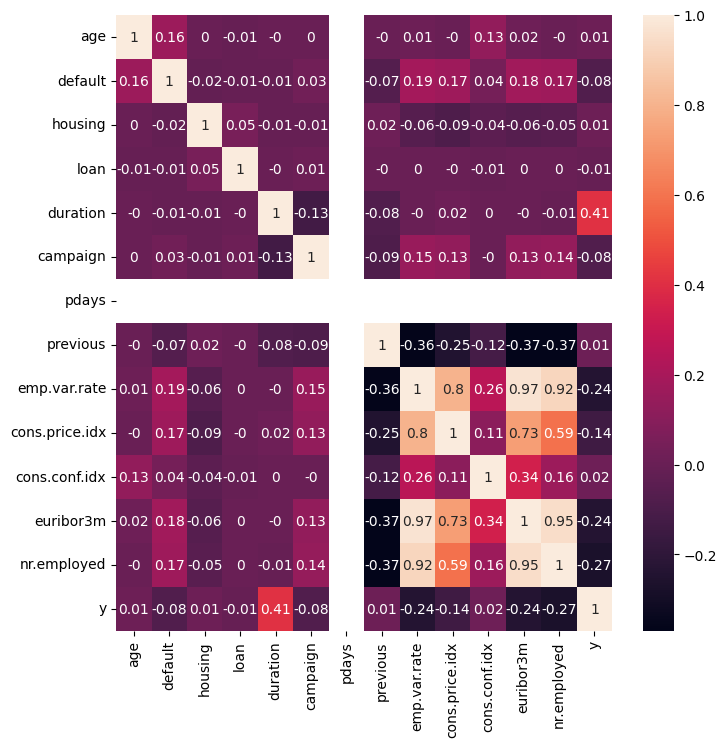

In [25]:
numeric = df.select_dtypes(include='number').columns.tolist()
corr = df[numeric].corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=corr, annot=True, ax=ax)

In [26]:
one_hot_cols = ['job', 'contact', 'marital',
                'education', 'month', 'day_of_week','poutcome', 'age']  # probaj i age bez one hot
df = pd.get_dummies(data=df, columns=one_hot_cols).astype('float64')
df.head()

,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,age_1,age_2,age_3,age_4,age_5,age_6
0,0.0,0.0,0.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2.0,0.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
df.dtypes

default     float64
housing     float64
loan        float64
duration    float64
campaign    float64
             ...   
age_2       float64
age_3       float64
age_4       float64
age_5       float64
age_6       float64
Length: 62, dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38251 entries, 0 to 38250
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   default                        38251 non-null  float64
 1   housing                        38251 non-null  float64
 2   loan                           38251 non-null  float64
 3   duration                       38251 non-null  float64
 4   campaign                       38251 non-null  float64
 5   pdays                          38251 non-null  float64
 6   previous                       38251 non-null  float64
 7   emp.var.rate                   38251 non-null  float64
 8   cons.price.idx                 38251 non-null  float64
 9   cons.conf.idx                  38251 non-null  float64
 10  euribor3m                      38251 non-null  float64
 11  nr.employed                    38251 non-null  float64
 12  y                              38251 non-null 

In [29]:
# probaj i norm i std
scaler = Normalizer()
cols_to_scale = ['duration', 'pdays',
                 'previous','campaign', 'emp.var.rate',	'cons.price.idx',	'cons.conf.idx']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,age_1,age_2,age_3,age_4,age_5,age_6
0,0.0,0.0,0.0,0.251581,0.000964,0.962946,0.0,0.001060,0.090602,-0.035086,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.146788,0.000985,0.984170,0.0,0.001084,0.092599,-0.035860,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,2.0,0.0,0.219589,0.000972,0.970663,0.0,0.001069,0.091328,-0.035368,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.148715,0.000985,0.983884,0.0,0.001083,0.092572,-0.035849,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,0.292393,0.000952,0.951467,0.0,0.001048,0.089522,-0.034668,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
df.describe()

,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,age_1,age_2,age_3,age_4,age_5,age_6
count,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,...,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000,38251.000000
mean,0.216805,1.069750,0.327652,0.215244,0.002414,0.954958,0.000094,0.000185,0.089466,-0.038744,...,0.196047,0.198269,0.086115,0.913885,0.175603,0.402055,0.252673,0.152022,0.009516,0.008131
std,0.412264,0.985435,0.723798,0.164964,0.002706,0.070166,0.000326,0.001459,0.006588,0.005146,...,0.397010,0.398701,0.280538,0.280538,0.380487,0.490319,0.434551,0.359047,0.097086,0.089803
min,0.000000,0.000000,0.000000,0.000000,0.000199,0.199025,0.000000,-0.003386,0.018568,-0.050551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.098117,0.000984,0.953769,0.000000,-0.001655,0.089270,-0.042143,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.168803,0.001891,0.980538,0.000000,0.001076,0.091744,-0.039868,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,0.284462,0.002921,0.990008,0.000000,0.001368,0.092675,-0.035581,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,0.979783,0.053901,0.995011,0.005879,0.001394,0.094302,-0.008362,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

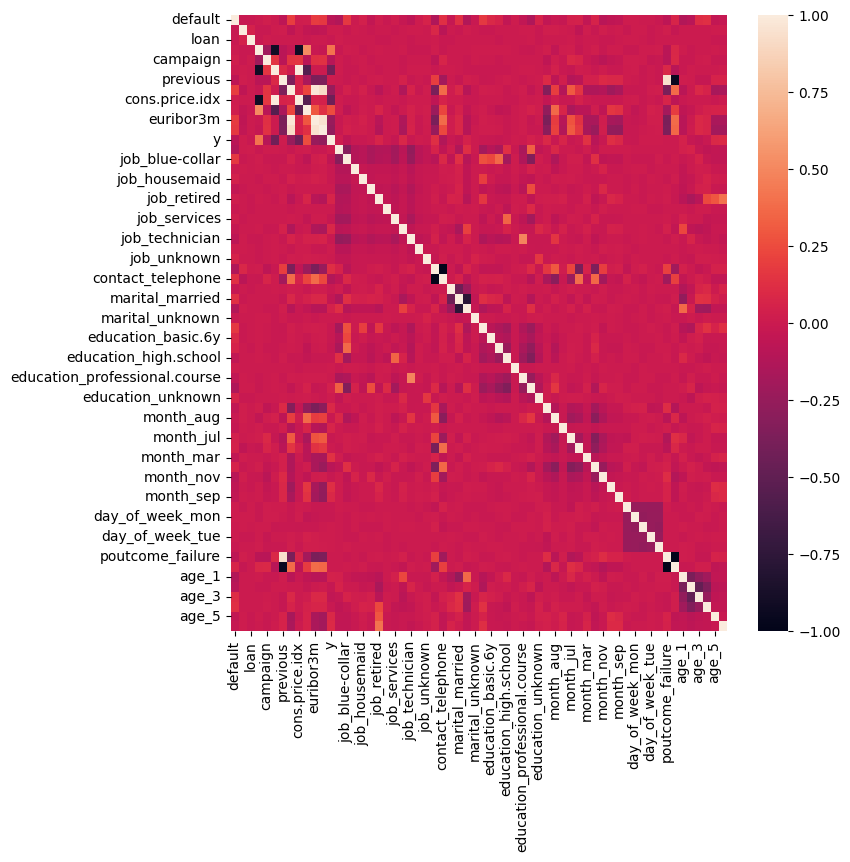

In [31]:
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=corr, annot=False, ax=ax)

## Isprobavanje modela


In [32]:
# Train test split
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

results = pd.DataFrame(
    columns=["Algorithm", "F1", "AUC", "Accuracy"])

In [33]:
np.random.seed(42)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)
f1 = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
acc = accuracy_score(y_test, pred)

print("F1 : %0.3f" % f1)
print("ROC: %0.3f" % auc)
print("Accuracy: %0.3f" % acc)

results.loc[-1] = ["Random Forest bez podešavanja hiperparametara", f1, auc, acc]
results.index = results.index + 1
testing = results.sort_index()

F1 : 0.486
ROC: 0.693
Accuracy: 0.926


In [34]:
cm = confusion_matrix(y_test,pred)
cm

array([[6822,  183],
       [ 380,  266]], dtype=int64)

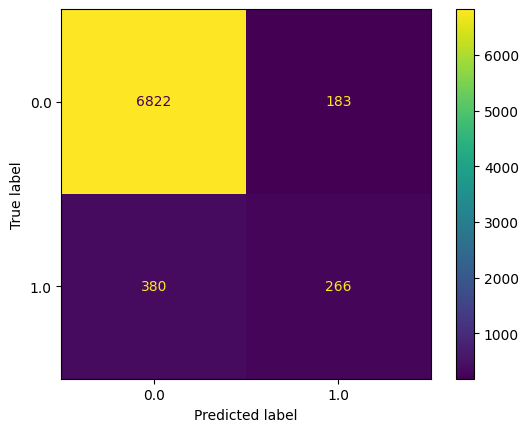

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rfc.classes_)
disp.plot()
plt.show()